# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

# Importing data

In [41]:
parasitized_data = os.listdir('cell_images/Parasitized/')

uninfected_data = os.listdir('cell_images/Uninfected/')


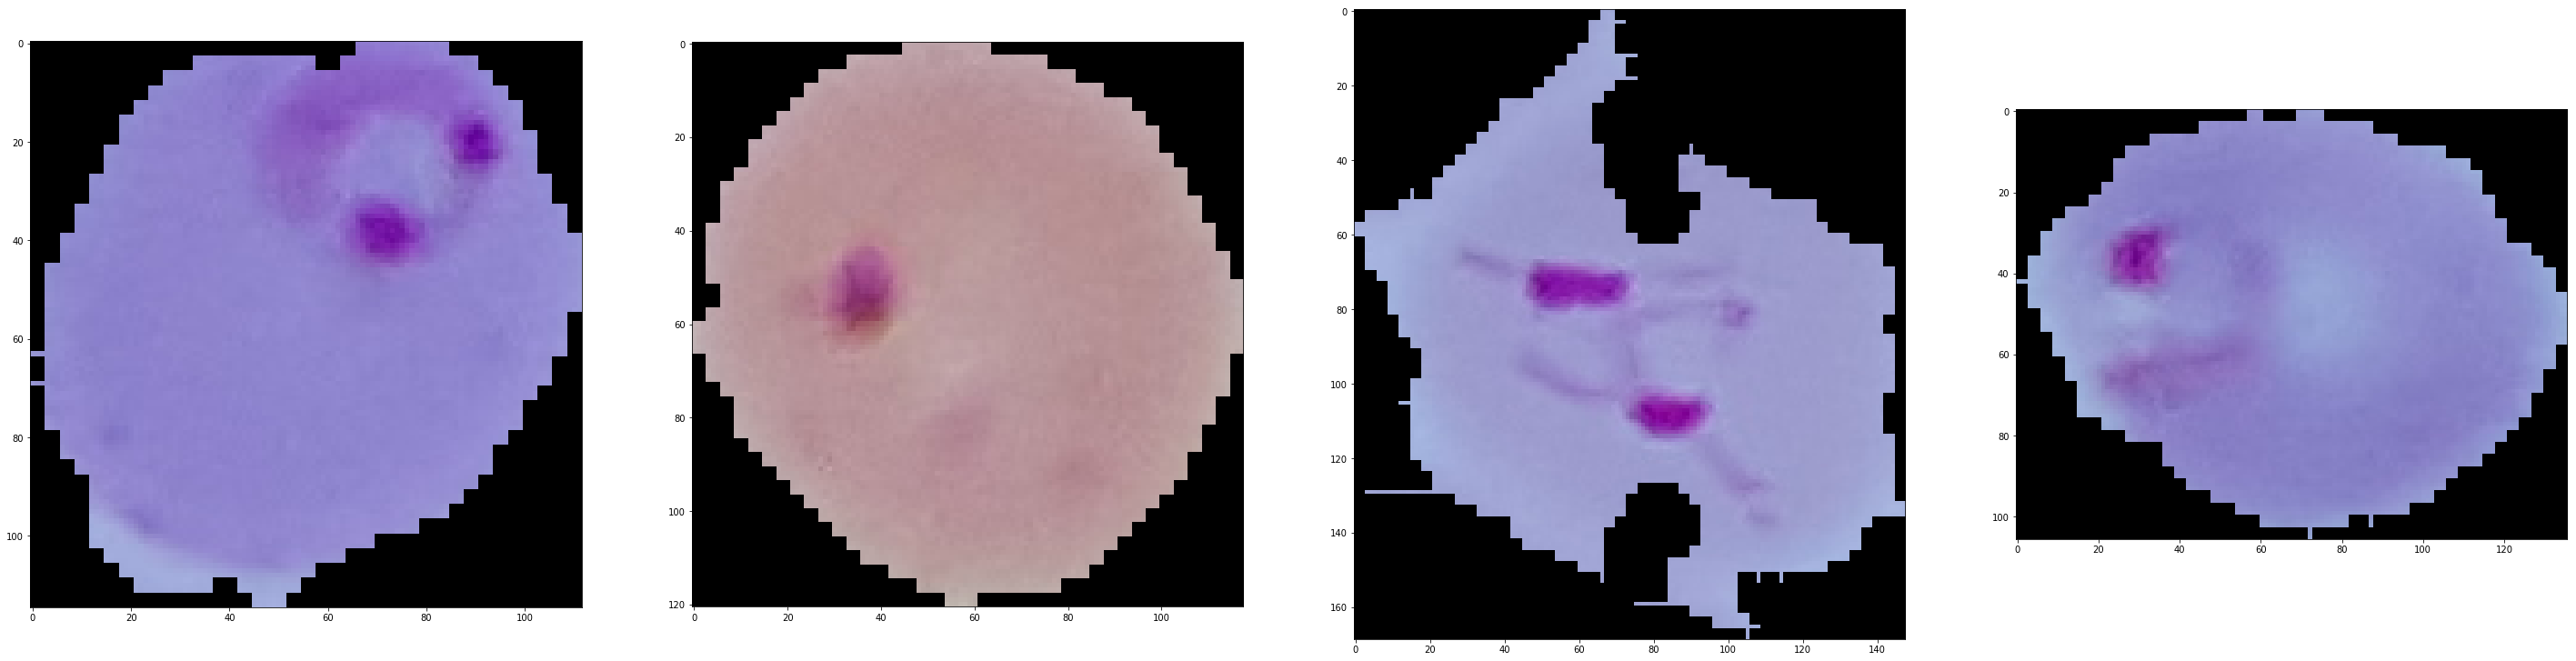

In [42]:
plt.figure(figsize = (50,50))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
plt.show()

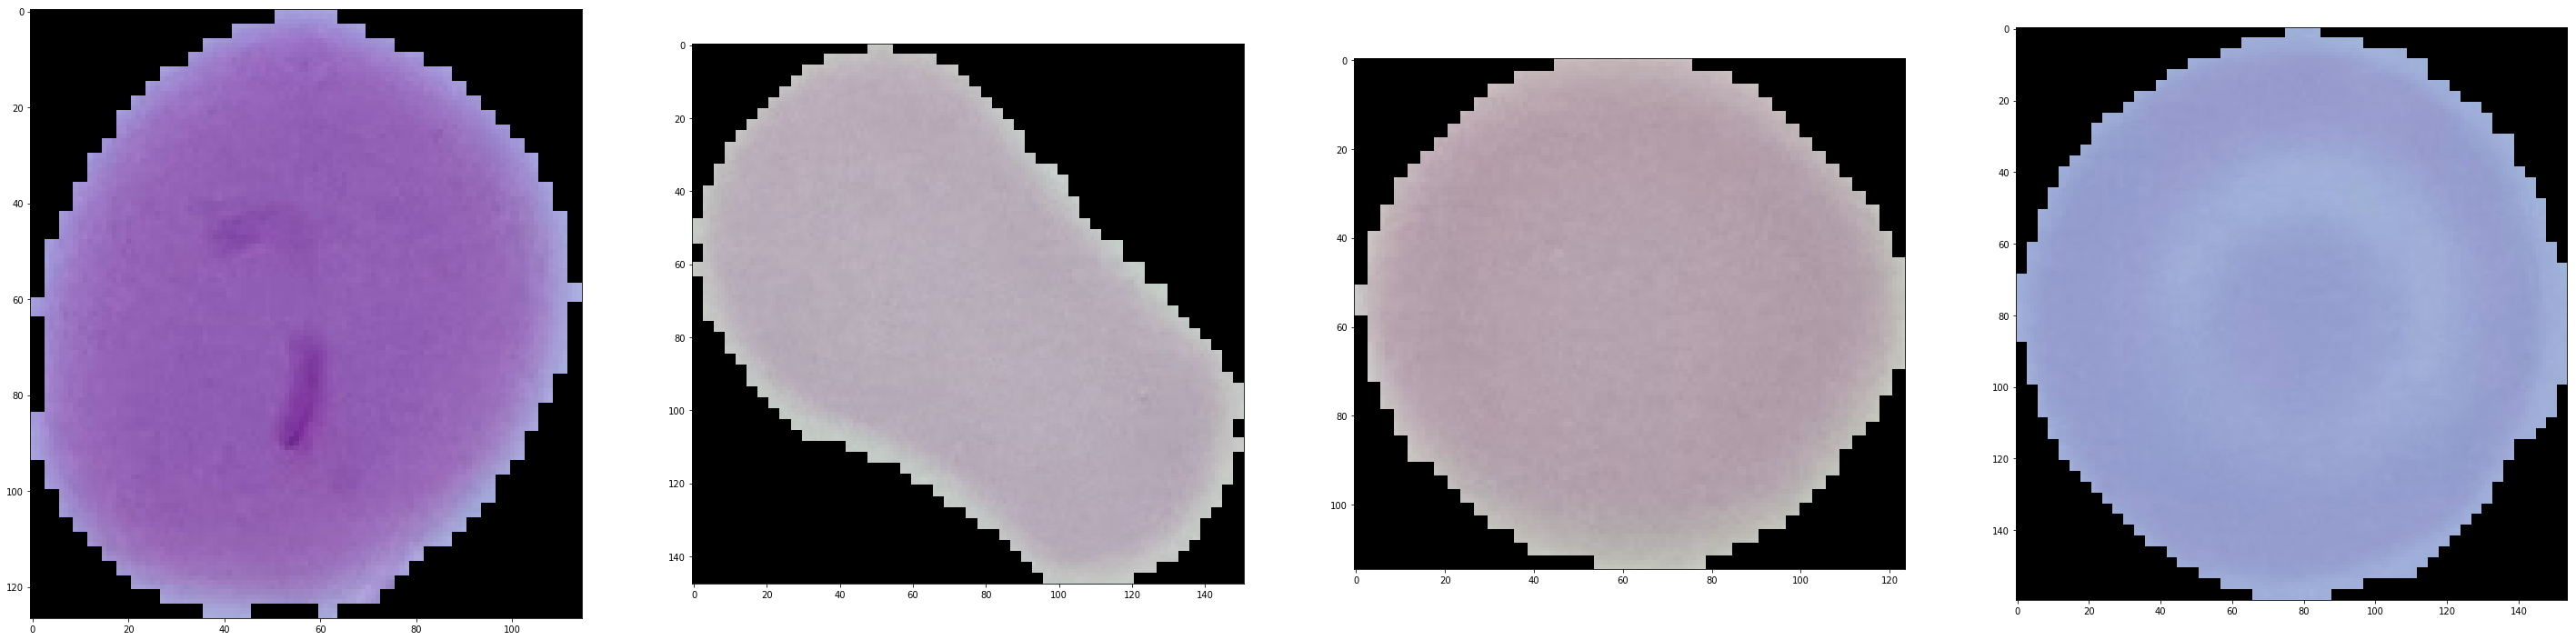

In [44]:
plt.figure(figsize = (50,50))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell_images/Uninfected' + "/" + uninfected_data[i])
    plt.imshow(img)
plt.show()

In [48]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50)) # Converting image to (50, 50)
        img_array = img_to_array(img_resize) # Converting to array
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50)) # Converting image to (50, 50)
        img_array = img_to_array(img_resize) # Converting to array
        data.append(img_array)
        labels.append(0)
    except:
        None

In [23]:
image_data = np.array(data)

labels = np.array(labels)

In [29]:
# Shuffling the data
idx = np.arange(image_data.shape[0])

np.random.shuffle(idx)

image_data = image_data[idx]

labels = labels[idx]

In [30]:
# Splitting data into testing and training sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [31]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)

y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [32]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

In [33]:
# Model

def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [34]:
height = 50 # Resized image size (50, 50)
width = 50
classes = 2 # 2 output classes
channels = 3 # RGB 
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxP

In [35]:
#Compile the model

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [37]:
h = model.fit(x_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
22046/22046 [==============================] - 139s 6ms/step - loss: 0.2104 - acc: 0.9223
Epoch 2/10
22046/22046 [==============================] - 153s 7ms/step - loss: 0.1780 - acc: 0.9371
Epoch 3/10
22046/22046 [==============================] - 167s 8ms/step - loss: 0.1693 - acc: 0.9436
Epoch 4/10
22046/22046 [==============================] - 153s 7ms/step - loss: 0.1612 - acc: 0.9459
Epoch 5/10
22046/22046 [==============================] - 164s 7ms/step - loss: 0.1569 - acc: 0.9487
Epoch 6/10
22046/22046 [==============================] - 174s 8ms/step - loss: 0.1522 - acc: 0.9486
Epoch 7/10
22046/22046 [==============================] - 172s 8ms/step - loss: 0.1521 - acc: 0.9502
Epoch 8/10
22046/22046 [==============================] - 176s 8ms/step - loss: 0.1517 - acc: 0.9497
Epoch 9/10
22046/22046 [==============================] - 186s 8ms/step - loss: 0.1484 - acc: 0.9507
Epoch 10/10
22046/22046 [==============================] - 187s 8ms/step - loss: 0.1443 - a

In [38]:
# Evaluate the model on test data
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 9s 2ms/step


In [39]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1403696408335806
ACCURACY : 0.9550072568940493
